# 파이썬으로 이미지 파일 다루기

python에서 OpenCV를 이용하여 이미지 파일을 열고 정보를 추출 해 본다.

컴퓨터에서 이미지가 표현되는 방식을 이해하는 데 도움이 될 것이다.

## 목차

- 들어가며
- 디지털 이미지
- Pillow 사용법
- Pillow를 활용한 데이터 전처리
- OpenCV
  - 안녕, OpenCV
  - 톺아보기
- 실습 : 비슷한 이미지 찾아내기
- 회고
- Ref

## 들어가며


In [1]:
#!pip3 install pillow opencv-python matplotlib

In [2]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_text) = cifar100.load_data()

In [3]:
X_train[0].shape

(32, 32, 3)

## 디지털 이미지

[![00](img/00.jpeg)](http://ko.wordow.com/english/dictionary/pixel)

- 화소(pixel, picture element)란?
  - 색상을 가진 점 하나

이미지를 저장하는 방법론
***

[![01](img/01.png)](https://ko.wikipedia.org/wiki/벡터_그래픽스)

- 비트맵(bitmap) == 래스터(raster)
  - 점 하나하나의 색상 값을 저장함
  - 사진 파일에 자주 사용
- 벡터(vector)
  - 상대적인 점과 선의 방정식으로 기록해서 사용
  - 깨짐이 없음(글꼴)

색상을 저장하는 다양한 방법
***

- RGB(원추세포가 인식하는 색)
  - [![02](img/02.png)](https://en.wikipedia.org/wiki/Cone_cell)
- YUV(흑백 + 1/4 해상도의 두 색상 채널) == YCbCr
  - [![03](img/03.gif)](https://en.wikipedia.org/wiki/File:YCbCr.GIF)
- HSV(Hue 색상, Saturation 채도, Value 명도)
  - [![04](img/04.gif)](https://github.com/shikitari/hsv_color)
- CMYK(Cyan, Magenta, Yellow, Black)
  - [![05](img/05.png)](https://ko.wikipedia.org/wiki/원색)

각 색을 구성하는 단일 축을 채널(Channel)이라고 함

## Pillow 사용법

PIL(Python Image Labrary)를 이어 받아서 서비스하고 있음

main은 OpenCV

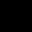

In [4]:
import numpy as np
from PIL import Image

# 결국 색은 배열 형태의 데이터
data = np.zeros([32, 32, 3], dtype=np.uint8)

# 이미지 객체로 변환함
image = Image.fromarray(data, 'RGB')
image

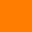

In [5]:
# 맨 앞의 채널은 R을 의미함
data[:, :] = [255, 125, 0]

image = Image.fromarray(data, 'RGB')
image

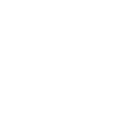

In [6]:
import numpy as np
from PIL import Image

# 결국 색은 배열 형태의 데이터
data = np.ones([128, 128, 3], dtype=np.uint8) * 255

# 이미지 객체로 변환함
image = Image.fromarray(data, 'RGB')
image

In [7]:
from PIL import Image

# 크기 확인
print(image.width, image.height)

#image.save('data/test.jpg')

128 128


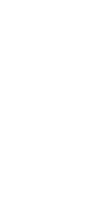

In [8]:
# 크기 변경
image.resize((100,200))

In [9]:
# 부분 추출
image.crop((10,10,20,20))

## Pillow를 활용한 데이터 전처리

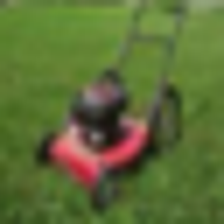

In [10]:
image_data = X_train[500]
image = Image.fromarray(image_data)
image.resize((224,224))

In [11]:
# 축 변경해보기
#image_data = image_data.swapaxes(0, 1)
#image = Image.fromarray(image_data)
#image.resize((224,224))

## OpenCV

[![06](img/06.jpeg)](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

[튜토리얼 제공](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)

**주의** RGB -> BGR로 변경

## 안녕 OpenCV & 톺아보기

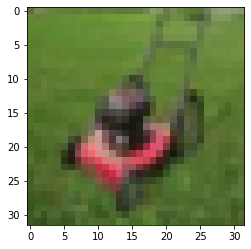

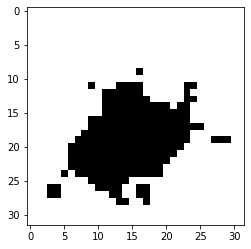

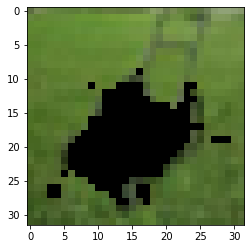

In [12]:
from  matplotlib import pyplot as plt
%matplotlib inline

import cv2 as cv
import numpy as np

# 이미지 가져오기
# img = cv.imread(img_path)
img = np.array(image)

# 현재 RGB값을 HSV값으로 변경
hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# 연두색 범위를 지정
lower_green = np.array([40,50,50])
upper_green = np.array([110,255,255])

# 연두색 최소 ~ 최대 범위에 해당하는 색만 마스크함
mask = cv.inRange(hsv, lower_green, upper_green)

# 동일한 이미지 두개를 넣고 mask를 씌어줌
res = cv.bitwise_and(img, img, mask=mask)

# 결과 출력
plt.imshow(img)
plt.show()

# 기본적으로 BGR임으로 RGB로 변경해야 함
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(res)
plt.show()

## 실습 : 비슷한 이미지 찾아내기

In [13]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 as cv

히스토그램 그려보기
***

In [14]:
def draw_color_histogram_from_image(img):
  f = plt.figure(figsize=(10,3))
  im1 = f.add_subplot(1,2,1)
  im1.imshow(img)
  im1.set_title("Image")
  
  im2 = f.add_subplot(1,2,2)
  color = tuple('rgb')
  for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    im2.plot(histr, color = col)
  im2.set_title("Hist")


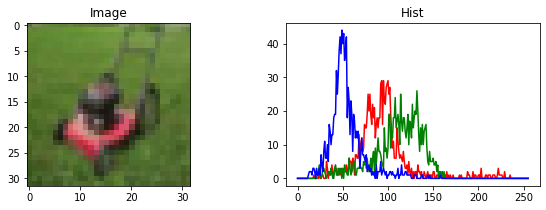

In [15]:
draw_color_histogram_from_image(X_train[500])

비교하기
***

 직접 코드를 짜기 전에 우선 사람의 말로 한번 `pseudo-code` 짜보자!

- 프로그램 실행
- 입력된 숫자의 이미지를 불러옴
- 검색 대상 이미지 중 가장 비슷한 이미지 5개 출력
  - 모든 이미지의 histogram을 뽑는다.
  - 검색 대상의 histogram과 모두 비교한다.
  - 비교 결과 중 가장 좋은 5가지 요소를 뽑는다.
    - 뽑은 요소를 출력한다.
- 프로그램 종료

In [16]:
def make_histogram(imgs):
  hists = []
  for img in imgs:
    temp = []

    for i in range(3):
      temp.append(cv.calcHist(img, [i], None, [4], [0, 256]))
    hist = np.concatenate(temp)
    hists.append(cv.normalize(hist, hist))
  return hists

In [17]:
hists = make_histogram(X_train)

In [18]:
hists[0]

array([[0.        ],
       [0.        ],
       [0.03427875],
       [0.6238733 ],
       [0.        ],
       [0.027423  ],
       [0.08226901],
       [0.54846   ],
       [0.        ],
       [0.03427875],
       [0.08226901],
       [0.5416043 ]], dtype=float32)

In [19]:
def compare_hist(idx, hists):
  compare_value = {}
  for i, hist in enumerate(hists):
    compare_value[i] = cv.compareHist(hists[idx], hist, cv.HISTCMP_CHISQR)
  return compare_value

In [20]:
compare_hists = compare_hist(500, hists)

In [21]:
def print_top_k(imgs, compare_hists, top_k:int = 5):
  compare_hists = sorted(compare_hists.items(), key=lambda item: item[1], reverse=True)
  #return compare_hists[:top_k]
  top_k_data = compare_hists[:top_k]
  print(top_k_data[0])
  plt.figure(figsize=(20,20))
  for idx, value in enumerate(top_k_data):
    plt.subplot(1, top_k, idx + 1)
    plt.imshow(imgs[value[0]])
    plt.title(value[1])

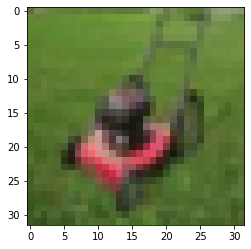

In [22]:
plt.imshow(X_train[500])

(22414, 5.6933951551324)


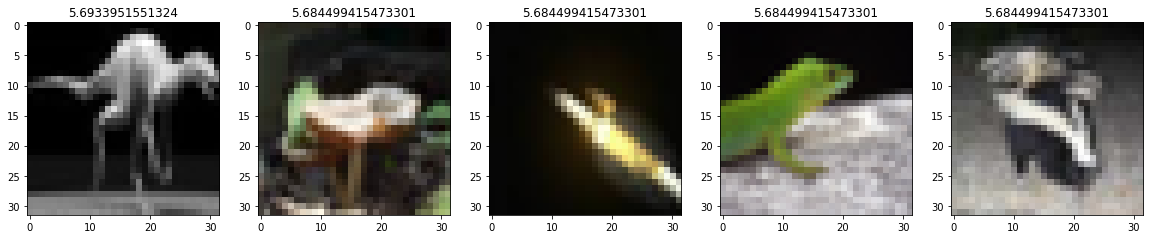

In [23]:
print_top_k(X_train, compare_hists)

## 회고

배우고 궁금한 것
***

어려웠는 것
***

시도한 것
***

실패한 것과 그 이유
***

## Ref

|날짜|제목(링크)|내용|
|:-:|:--------:|:--:|
|?|[pixel?](http://ko.wordow.com/english/dictionary/pixel)|pixel 이미지 차용|
|?|[벡터 그래픽스](https://ko.wikipedia.org/wiki/벡터_그래픽스)|vector graphic 설명|
|?|[원추세포](https://en.wikipedia.org/wiki/Cone_cell)|원추 세포가 인식하는 범위|
|?|[YCbCr](https://en.wikipedia.org/wiki/File:YCbCr.GIF)|YUV 분포|
|?|[HSV space](https://github.com/shikitari/hsv_color)|HSV 분포|
|?|[색의 3 원색](https://ko.wikipedia.org/wiki/원색)|CMYK 모습|
|?|[blue 추출 예제](https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html)|OpenCV 예제!|
|?|[OpenCV 소개](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)|OpenCV 사용법|